In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)

В соревновании использвоалась метрика RMSE, поэтому будем использовать ее

In [18]:
TARGET_COL = 'SalePrice'
ID_COL = 'Id'
CAT_COLS = ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', # 'Alley',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',  'Heating', 
       'Electrical',  'Functional', 'GarageType', 'SaleType', 'SaleCondition', #  'MiscFeature',
       'PavedDrive', 'Street'] 
RATE_CAT_COLS = ['FireplaceQu', 'KitchenQual', 'ExterQual', 
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'HeatingQC',  'GarageFinish','GarageQual', 'GarageCond']  # 'PoolQC', 'Fence'
RATE_COLS = ['OverallQual', 'OverallCond'] 
BIN_COL = 'CentralAir' # y n -> 1 0
DISCRETE_COLS = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
              'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
REAL_COLS = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
       'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
       '1stFlrSF', 'GrLivArea', '2ndFlrSF', 'LowQualFinSF', 'YearBuilt', 
       'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold'] 

NAN_COLS = ['Alley', 'MiscFeature', 'PoolQC', 'Fence']

In [17]:
1 + 1 + len(CAT_COLS) + len(REAL_COLS) + len(RATE_CAT_COLS) + len(RATE_COLS) + 1 + len(DISCRETE_COLS)

81

In [4]:
raw_path = '../data/raw/'
train = pd.read_csv(os.path.join(raw_path, 'train.csv'))
test = pd.read_csv(os.path.join(raw_path, 'test.csv'))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

В наборе данных есть колонки с очень большим числом Nan значений. Удалим некоторые из них, а остальные заполним нулями

In [19]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
def set_idx(df: pd.DataFrame, idx_col: str) -> pd.DataFrame:
    df = df.set_index(idx_col)
    return df

In [23]:
def drop_nan_cols(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    df = df.drop(cols, axis=1)
    return df

In [21]:
def process_binary(df: pd.DataFrame) -> pd.DataFrame:
    df[BIN_COL] = df[BIN_COL].map(dict(Y=1, N=0))
    return df

In [22]:
def replace_nans(df: pd.DataFrame) -> pd.DataFrame:
    df = df.fillna(0)
    return df

In [24]:
def process_rate_cat_cols(df: pd.DataFrame) -> pd.DataFrame:
    df[['FireplaceQu', 'KitchenQual', 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'HeatingQC', 'GarageQual', 'GarageCond']] \
    = df[['FireplaceQu', 'KitchenQual', 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'HeatingQC', 'GarageQual', 'GarageCond']] \
        .replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [5,4,3,2,1])
    df[['BsmtExposure']] = df[['BsmtExposure']].replace(['Gd', 'Av', 'Mn', 'No'], [4,3,2,1])
    df[['BsmtFinType1', 'BsmtFinType2']] = df[['BsmtFinType1', 'BsmtFinType2']].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'], [6,5,4,3,2,1])
    df[['GarageFinish']] = df[['GarageFinish']].replace(['Fin', 'RFn', 'Unf'], [3,2,1])
    # df['Fence'] = df[['Fence']].replace(['GdPrv', 'MnPrv', 'GdWo', 'MnWw'], [2, 1, 2, 1])

    return df

In [25]:
def cast_types(df: pd.DataFrame) -> pd.DataFrame:
    df[CAT_COLS] = df[CAT_COLS].astype('category') # +
    df[RATE_CAT_COLS] = df[RATE_CAT_COLS].astype(np.int32) # +
    df[RATE_COLS] = df[RATE_COLS].astype(np.int32) # +
    df[BIN_COL] = df[BIN_COL].astype(np.int32) # +
    df[DISCRETE_COLS] = df[DISCRETE_COLS].astype(np.int32) # +
    df[REAL_COLS] = df[REAL_COLS].astype(np.int32)
    
    return df

In [26]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df = set_idx(df, ID_COL)
    df = drop_nan_cols(df, NAN_COLS)
    df = process_binary(df)
    df = replace_nans(df)
    df = process_rate_cat_cols(df)
    df = cast_types(df)
    return df

In [27]:
train, target = train.drop(TARGET_COL, axis=1), train[TARGET_COL]

In [28]:
train = preprocess(train)
test = preprocess(test)

In [29]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003,2,2,548,3,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976,2,2,460,3,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001,2,2,608,3,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998,1,3,642,3,3,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000,2,3,836,3,3,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


In [30]:
train.shape

(1460, 75)

<AxesSubplot:>

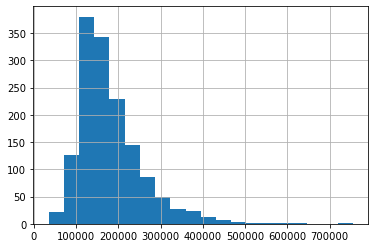

In [31]:
target.hist(bins=20)

In [33]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Основная часть значений целевой переменной находятся в диапазоне от 130 до 215 тыс. У распределения имеется явный хвост справа

## CatBoost modeling

In [37]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from statistics import mean

In [35]:
kf = KFold(n_splits=5)

In [36]:
rmse_cv = []
for train_index, val_index in kf.split(train, target):
    X_train, y_train = train.iloc[train_index], target.iloc[train_index]
    X_val, y_val = train.iloc[val_index], target.iloc[val_index]

    model = CatBoostRegressor(
            learning_rate=0.01,
            early_stopping_rounds=200,
            verbose=100,
            eval_metric='RMSE',
            )

    model.fit(X_train, y_train, eval_set=(X_val, y_val), cat_features=CAT_COLS)
    y_pred = model.predict(X_val)
    rmse_cv.append(mean_squared_error(y_val, y_pred, squared=False))
                

0:	learn: 80087.4472890	test: 73866.9969022	best: 73866.9969022 (0)	total: 208ms	remaining: 3m 27s
100:	learn: 46340.5647134	test: 42679.0634762	best: 42679.0634762 (100)	total: 4.38s	remaining: 39s
200:	learn: 32237.4135723	test: 31511.7355175	best: 31511.7355175 (200)	total: 8.04s	remaining: 31.9s
300:	learn: 25859.8532415	test: 27436.6735015	best: 27436.6735015 (300)	total: 12.3s	remaining: 28.4s
400:	learn: 22900.7527952	test: 25987.7068894	best: 25987.7068894 (400)	total: 16.8s	remaining: 25.1s
500:	learn: 20837.9272119	test: 25024.8394283	best: 25024.8394283 (500)	total: 21.1s	remaining: 21s
600:	learn: 19408.3190429	test: 24403.7938799	best: 24403.7938799 (600)	total: 24.8s	remaining: 16.5s
700:	learn: 18374.1830624	test: 23958.9323730	best: 23958.9323730 (700)	total: 28.5s	remaining: 12.2s
800:	learn: 17567.2034487	test: 23620.2182712	best: 23619.1267391 (798)	total: 32.6s	remaining: 8.1s
900:	learn: 16917.3897839	test: 23340.6745828	best: 23340.6745828 (900)	total: 36.6s	remai

In [38]:
mean(rmse_cv)

26191.669638429375

Попробуем поработать с признаками

### Подбор признаков

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from matplotlib import pyplot

In [40]:
X_train, X_val, y_train, y_val = train_test_split(train, target, train_size=0.8, random_state=42)
X_train.shape, X_val.shape

((1168, 75), (292, 75))

In [41]:
def select_features(X_train: pd.DataFrame, y_train: pd.Series, X_test: pd.DataFrame):
	fs = SelectKBest(score_func=f_regression, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [42]:
int_cols = train.select_dtypes(np.int32).columns

In [43]:
X_train_fs, X_val_fs, fs = select_features(X_train[int_cols].astype(np.float32), y_train, X_val[int_cols].astype(np.float32))

In [44]:
X_train.shape, X_train_fs.shape

((1168, 75), (1168, 49))

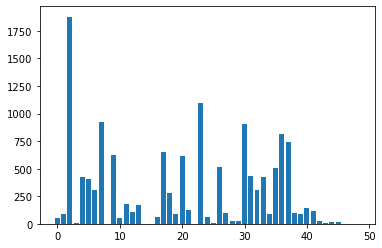

In [45]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Важное количество числовых признаков +- равно 15

In [46]:
def select_features(X_train: pd.DataFrame, y_train: pd.Series, X_test: pd.DataFrame):
	fs = SelectKBest(score_func=f_regression, k=15)
	fs.fit(X_train, y_train)
	cols = fs.get_support(indices=True)
	X_train_fs = X_train.iloc[:,cols]
	X_test_fs = X_test.iloc[:,cols]
	return X_train_fs, X_test_fs, fs

In [47]:
X_train_fs, X_val_fs, fs = select_features(X_train[int_cols].astype(np.float32), y_train, X_val[int_cols].astype(np.float32))

In [49]:
X_train_fs.shape, X_val_fs.shape

((1168, 15), (292, 15))

In [50]:
X_train_fs.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'GarageArea'],
      dtype='object')

In [55]:
X_train_fs = X_train_fs.merge(X_train[CAT_COLS], left_index=True, right_index=True)
X_val_fs = X_val_fs.merge(X_val[CAT_COLS], left_index=True, right_index=True)

In [54]:
train.shape, train[int_cols].shape

((1460, 75), (1460, 49))

In [56]:
X_train_fs.shape

(1168, 41)

In [57]:
X_train_fs.head()

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageFinish,GarageCars,GarageArea,MSSubClass,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,SaleType,SaleCondition,PavedDrive,Street
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
255,5.0,1957.0,1957.0,3.0,3.0,1314.0,1314.0,1314.0,1.0,3.0,5.0,0.0,2.0,1.0,294.0,20,RL,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Typ,Attchd,WD,Normal,Y,Pave
1067,6.0,1993.0,1994.0,4.0,4.0,799.0,799.0,1571.0,2.0,3.0,7.0,3.0,2.0,2.0,380.0,60,RL,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,SBrkr,Typ,Attchd,WD,Normal,Y,Pave
639,5.0,1910.0,1950.0,3.0,2.0,796.0,796.0,796.0,1.0,3.0,4.0,0.0,0.0,0.0,0.0,30,RL,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,Wd Sdng,None,CBlock,GasA,FuseA,Typ,0,WD,Normal,P,Pave
800,5.0,1937.0,1950.0,3.0,4.0,731.0,981.0,1768.0,1.0,4.0,7.0,3.0,1.0,1.0,240.0,50,RL,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,BrkTil,GasA,SBrkr,Typ,Detchd,WD,Normal,Y,Pave
381,5.0,1924.0,1950.0,3.0,3.0,1026.0,1026.0,1691.0,2.0,4.0,6.0,4.0,1.0,1.0,308.0,50,RL,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Sdng,None,BrkTil,GasA,SBrkr,Typ,Detchd,WD,Normal,Y,Pave


In [59]:
selected_cols = X_train_fs.columns

model = CatBoostRegressor(iterations = 10000,
                        verbose = 1000,
                        learning_rate = 0.08,
                        eval_metric = 'RMSE',
                        random_seed = 42,
                        # logging_level = 'Silent',
                        use_best_model = True,
                        loss_function = 'RMSE',
                        od_type = 'Iter',
                        od_wait = 1000,
                        one_hot_max_size = 20,
                        l2_leaf_reg = 100,
                        depth = 3,
                        rsm = 0.6,
                        random_strength = 2,
                        bagging_temperature = 10)

In [60]:
kf = KFold(n_splits=5)

rmse_cv = []
for train_index, val_index in kf.split(train, target):
    X_train, y_train = train[selected_cols].iloc[train_index], target.iloc[train_index]
    X_val, y_val = train[selected_cols].iloc[val_index], target.iloc[val_index]


    model = CatBoostRegressor(
            learning_rate=0.01,
            early_stopping_rounds=200,
            verbose=100,
            eval_metric='RMSE',
            )



    model.fit(X_train, y_train, eval_set=(X_val, y_val), cat_features=CAT_COLS)
    y_pred = model.predict(X_val)
    rmse_cv.append(mean_squared_error(y_val, y_pred, squared=False))

0:	learn: 80093.4649706	test: 73902.0764189	best: 73902.0764189 (0)	total: 85.7ms	remaining: 2m 51s
200:	learn: 33848.3527489	test: 31756.5428201	best: 31756.5428201 (200)	total: 7.07s	remaining: 1m 3s
400:	learn: 24728.6045709	test: 27155.1370287	best: 27155.1370287 (400)	total: 14.6s	remaining: 58.1s
600:	learn: 22016.6861449	test: 26344.2952223	best: 26344.2952223 (600)	total: 21.6s	remaining: 50.4s
800:	learn: 20504.1365573	test: 25935.0933147	best: 25930.9371269 (799)	total: 28.6s	remaining: 42.9s
1000:	learn: 19140.5516425	test: 25701.2741395	best: 25701.2741395 (1000)	total: 36s	remaining: 35.9s
1200:	learn: 18021.3154110	test: 25517.9199333	best: 25517.9199333 (1200)	total: 43.2s	remaining: 28.8s
1400:	learn: 17253.0682606	test: 25432.0128736	best: 25431.7294567 (1396)	total: 50.6s	remaining: 21.6s
1600:	learn: 16554.3794543	test: 25339.6271648	best: 25334.0419303 (1580)	total: 58s	remaining: 14.5s
1800:	learn: 15857.8362110	test: 25266.6355448	best: 25262.8317861 (1785)	total:

In [61]:
mean(rmse_cv)

26807.077878907938

Ошибка стала немного больше

Мы уменьшили количество численных признаков, их количество сейчас значительно меньше, чем количество категориальных. Поработаем с категориальными

In [62]:
from sklearn.model_selection import GridSearchCV

In [70]:
grid = {
        'one_hot_max_size': [8, 12],
        'model_size_reg': [0, 0.4, 0.6],
        'max_ctr_complexity': [2, 6], 
        'ctr_leaf_count_limit': [3, 6]
        }


model = CatBoostRegressor(
            learning_rate=0.01,
            early_stopping_rounds=200,
            verbose=100,
            eval_metric='RMSE',
            cat_features=CAT_COLS
            )

grid_search = GridSearchCV(estimator = model, param_grid = grid, scoring = 'neg_root_mean_squared_error', cv = 5)

grid_search.fit(X_train_fs, y_train)

print(grid_search.best_estimator_)

0:	learn: 79301.1008171	total: 23.7ms	remaining: 47.4s
200:	learn: 76141.4105554	total: 5.25s	remaining: 47s
400:	learn: 73618.0011724	total: 10.1s	remaining: 40.4s
600:	learn: 71366.8639558	total: 15.1s	remaining: 35.2s
800:	learn: 69163.9271116	total: 20.3s	remaining: 30.3s
1000:	learn: 66866.6634575	total: 25.7s	remaining: 25.7s
1200:	learn: 64549.1438097	total: 32.2s	remaining: 21.4s
1400:	learn: 62147.8986637	total: 37.8s	remaining: 16.2s
1600:	learn: 59983.4747008	total: 43.4s	remaining: 10.8s
1800:	learn: 57774.8891100	total: 48.8s	remaining: 5.39s
1999:	learn: 56006.1293295	total: 54s	remaining: 0us
0:	learn: 79167.4327468	total: 36.7ms	remaining: 1m 13s
200:	learn: 76176.0583282	total: 5.42s	remaining: 48.5s
400:	learn: 74071.3406003	total: 10.6s	remaining: 42.4s
600:	learn: 72379.8037009	total: 16.6s	remaining: 38.7s
800:	learn: 70545.7621459	total: 22.4s	remaining: 33.5s
1000:	learn: 68494.1876305	total: 28.6s	remaining: 28.6s
1200:	learn: 66487.0258406	total: 34.6s	remainin

KeyboardInterrupt: 

Не успел(

In [66]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
kf = KFold(n_splits=5)

rmse_cv = []
for train_index, val_index in kf.split(train, target):
    X_train, y_train = train[selected_cols].iloc[train_index], target.iloc[train_index]
    X_val, y_val = train[selected_cols].iloc[val_index], target.iloc[val_index]


    model = CatBoostRegressor(
            learning_rate=0.01,
            early_stopping_rounds=200,
            verbose=100,
            eval_metric='RMSE',
            )

    model.fit(X_train, y_train, eval_set=(X_val, y_val), cat_features=CAT_COLS)
    y_pred = model.predict(X_val)
    rmse_cv.append(mean_squared_error(y_val, y_pred, squared=False))

In [ ]:
mean(rmse_cv)

In [71]:
X_train_fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 255 to 1127
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OverallQual    1168 non-null   float32 
 1   YearBuilt      1168 non-null   float32 
 2   YearRemodAdd   1168 non-null   float32 
 3   ExterQual      1168 non-null   float32 
 4   BsmtQual       1168 non-null   float32 
 5   TotalBsmtSF    1168 non-null   float32 
 6   1stFlrSF       1168 non-null   float32 
 7   GrLivArea      1168 non-null   float32 
 8   FullBath       1168 non-null   float32 
 9   KitchenQual    1168 non-null   float32 
 10  TotRmsAbvGrd   1168 non-null   float32 
 11  FireplaceQu    1168 non-null   float32 
 12  GarageFinish   1168 non-null   float32 
 13  GarageCars     1168 non-null   float32 
 14  GarageArea     1168 non-null   float32 
 15  MSSubClass     1168 non-null   category
 16  MSZoning       1168 non-null   category
 17  LotShape       1168 non-null   

## Попробуем обучить другой алгоритм

Оставим колонки из предыдущего пункта

In [72]:
X_train_fs.shape

(1168, 41)

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [74]:
def one_hot_encode(df: pd.DataFrame, ohe: OneHotEncoder) -> pd.DataFrame: 
    # df.info()
    ohe_df = pd.DataFrame(ohe.transform(df[CAT_COLS].astype(str)), index=df.index)
    ohe_df = ohe_df.astype(np.int8)
    df = df.merge(ohe_df, left_index=True, right_index=True)
    df = df.drop(CAT_COLS, axis=1)
    return df

In [79]:
def normalize_real_cols(df: pd.DataFrame, scaler: MinMaxScaler) -> pd.DataFrame:
    x_scaled = scaler.transform(df[FLOAT_COLS])
    
    scaled_cols = pd.DataFrame(x_scaled, index=df.index)
    # print(scaled_cols.head())
    df = df.merge(scaled_cols, left_index=True, right_index=True)
    # print(df.head())
    df = df.drop(FLOAT_COLS, axis=1)
    return df

In [78]:
FLOAT_COLS = X_train_fs.select_dtypes(np.float32).columns

In [86]:
FLOAT_COLS

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'GarageArea'],
      dtype='object')

In [81]:
svr_cols = X_train_fs.columns

In [80]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(X_train[CAT_COLS].astype(str))
scaler = MinMaxScaler().fit(X_train[FLOAT_COLS])

In [82]:
X_train = one_hot_encode(X_train, ohe)
X_val = one_hot_encode(X_val, ohe)
test = one_hot_encode(test[svr_cols], ohe)
X_train = normalize_real_cols(X_train, scaler)
X_val = normalize_real_cols(X_val, scaler)
test = normalize_real_cols(test, scaler)

In [83]:
X_train.head()

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0.666667,0.948148,0.883333,0.666667,0.8,0.266999,0.180373,0.316905,0.666667,0.666667,0.500000,0.0,0.666667,0.50,0.394245
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0.555556,0.748148,0.433333,0.333333,0.8,0.393637,0.320663,0.213726,0.666667,0.333333,0.333333,0.6,0.666667,0.50,0.330935
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0.666667,0.933333,0.866667,0.666667,0.8,0.286962,0.202488,0.334408,0.666667,0.666667,0.333333,0.6,0.666667,0.50,0.437410
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0.666667,0.296296,0.333333,0.333333,0.6,0.235808,0.216655,0.318517,0.333333,0.666667,0.416667,0.8,0.333333,0.75,0.461871
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0.777778,0.925926,0.833333,0.666667,0.8,0.357143,0.280235,0.429295,0.666667,0.666667,0.583333,0.6,0.666667,0.75,0.601439


In [84]:
from sklearn.svm import SVR

In [85]:
svr = SVR(C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_val)
print(mean_squared_error(y_val, y_pred, squared=False))

84096.69608591466


SVR работает явно хуже, чем CatBoost. Выбираем CatBoost